<a href="https://colab.research.google.com/github/fatihadr/Project-Data-Analyst/blob/main/POST_TEST_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DATA WRANGLING**

Data Gathering

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
df = pd.read_csv('/content/Copy of M5_World_Championship.csv')
df

FileNotFoundError: [Errno 2] No such file or directory: '/content/Copy of M5_World_Championship.csv'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Index                  115 non-null    int64 
 1   Hero                   115 non-null    object
 2   T_Picked               115 non-null    int64 
 3   T_Wins                 115 non-null    int64 
 4   T_Loses                115 non-null    int64 
 5   T_WinRate              115 non-null    object
 6   T_PickPercentage       115 non-null    object
 7   BS_Picked              115 non-null    int64 
 8   BS_Wins                115 non-null    int64 
 9   BS_Loses               115 non-null    int64 
 10  BS_WinRate             115 non-null    object
 11  RS_Picked              115 non-null    int64 
 12  RS_Wins                115 non-null    int64 
 13  RS_Loses               115 non-null    int64 
 14  RS_WinRate             115 non-null    object
 15  T_Banned               

In [ ]:
df.describe()

,Index,T_Picked,T_Wins,T_Loses,BS_Picked,BS_Wins,BS_Loses,RS_Picked,RS_Wins,RS_Loses,T_Banned,T_PicksBans
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,58.000000,121.521739,60.739130,60.782609,60.739130,30.043478,30.695652,60.782609,30.695652,30.086957,121.513043,243.034783
std,33.341666,165.790946,84.578842,82.061250,82.204397,41.649412,41.148676,84.206490,43.392572,41.381317,180.269358,322.978407
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,29.500000,6.000000,3.000000,4.000000,3.000000,1.000000,2.000000,3.000000,1.000000,2.000000,2.500000,10.500000
50%,58.000000,43.000000,25.000000,22.000000,20.000000,11.000000,12.000000,23.000000,12.000000,12.000000,24.000000,83.000000
75%,86.500000,193.000000,89.000000,101.000000,101.500000,48.000000,51.500000,95.000000,44.500000,46.000000,174.500000,373.000000
max,115.000000,727.000000,383.000000,393.000000,361.000000,184.000000,191.000000,379.000000,199.000000,202.000000,741.000000,1211.000000


In [ ]:
df.isnull().sum()

,0
Index,0
Hero,0
T_Picked,0
T_Wins,0
T_Loses,0
T_WinRate,0
T_PickPercentage,0
BS_Picked,0
BS_Wins,0
BS_Loses,0


In [ ]:
df.isnull().sum().sum()

NameError: name 'df' is not defined

In [ ]:
df.duplicated().sum()

0

# **Data Cleansing/Preposessing**

In [ ]:
# Menghapus spasi yang tidak diperlukan
df.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

# Mengonversi string persentase menjadi nilai numerik
kolom_persentase = ['T_WinRate', 'T_PickPercentage', 'BS_WinRate', 'RS_WinRate',
                    'T_BansPercentage', 'T_PicksBansPercentage']
for kolom in kolom_persentase:
 # Mengganti tanda "-" dengan 0.0 sebelum dikonversi menjadi float
 f[kolom] = df[kolom].str.replace('%', '').str.replace('-', '0.0').astype(float)

# Menampilkan data yang sudah diubah
df

,Index,Hero,T_Picked,T_Wins,T_Loses,T_WinRate,T_PickPercentage,BS_Picked,BS_Wins,BS_Loses,...,RS_Loses,RS_WinRate,T_Banned,T_BansPercentage,T_PicksBans,T_PicksBansPercentage,Played By,Played With,Played Vs.,Roles
0,1,Valentina,727,334,393,45.94,52.00,348,157,191,...,202,46.70,484,34.62,1211,86.62,19 (11-8)19 (10-9)19 (10-9)19 (7-12)17 (8-9),164 (83-81) 162 (79-83) 140 (71-69) 121 (58-6...,218 (85-133) 178 (68-110) 174 (77-97) 173 (82...,Mage
1,2,Fredrinn,726,383,343,52.75,51.93,361,184,177,...,166,54.52,475,33.98,1201,85.91,21 (15-6)18 (14-4)18 (12-6)18 (9-9)17 (10-7),164 (83-81) 131 (81-50) 126 (69-57) 122 (69-5...,218 (133-85) 190 (106-84) 185 (79-106) 173 (8...,Support
2,3,Terizla,620,348,272,56.13,44.35,291,168,123,...,149,54.71,435,31.12,1055,75.46,22 (12-10)18 (10-8)15 (9-6)14 (10-4)14 (8-6),162 (79-83) 114 (76-38) 108 (56-52) 105 (49-5...,185 (106-79) 178 (110-68) 132 (70-62) 119 (65...,Fighter
3,4,Edith,527,265,262,50.28,37.70,258,125,133,...,129,52.04,477,34.12,1004,71.82,14 (9-5)14 (9-5)14 (6-8)13 (10-3)13 (9-4),122 (69-53) 112 (48-64) 109 (55-54) 100 (42-5...,174 (97-77) 147 (76-71) 132 (62-70) 108 (51-5...,Tank
4,5,Irithel,502,255,247,50.80,35.91,245,129,116,...,131,49.03,208,14.88,710,50.79,16 (8-8)15 (10-5)15 (10-5)12 (7-5)12 (7-5),140 (71-69) 126 (69-57) 108 (56-52) 100 (42-5...,145 (73-72) 132 (60-72) 120 (68-52) 110 (47-6...,Marksman
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,111,Vale,1,0,1,0.00,0.07,1,0,1,...,0,0.00,1,0.07,2,0.14,1 (0-1),1 (0-1) 1 (0-1) 1 (0-1) 1 (0-1),1 (0-1) 1 (0-1) 1 (0-1) 1 (0-1) 1 (0-1),Mage
111,112,Vexana,1,0,1,0.00,0.07,0,0,0,...,1,0.00,0,0.00,1,0.07,1 (0-1),1 (0-1) 1 (0-1) 1 (0-1) 1 (0-1),1 (0-1) 1 (0-1) 1 (0-1) 1 (0-1) 1 (0-1),Mage
112,113,Zilong,1,0,1,0.00,0.07,0,0,0,...,1,0.00,1,0.07,2,0.14,1 (0-1),1 (0-1) 1 (0-1) 1 (0-1) 1 (0-1),1 (0-1) 1 (0-1) 1 (0-1) 1 (0-1) 1 (0-1),Fighter
113,114,Layla,0,0,0,0.00,0.00,0,0,0,...,0,0.00,1,0.07,1,0.07,-,-,-,Marksman


# **EDA PARAMETER**

Distribution Of Win Rates

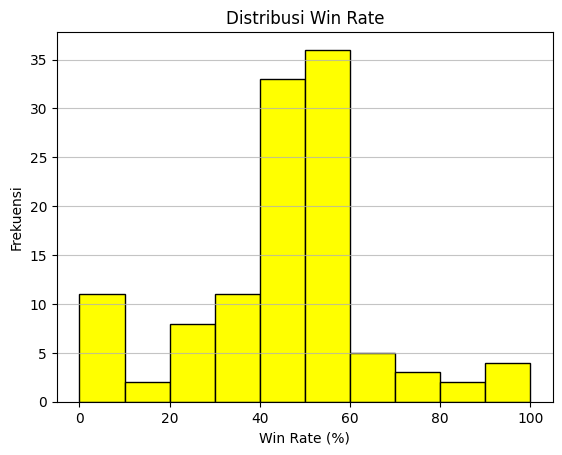

In [ ]:
plt.hist(df['T_WinRate'], bins=10, color='yellow', edgecolor='black')
plt.title('Distribusi Win Rate')
plt.xlabel('Win Rate (%)')
plt.ylabel('Frekuensi')
plt.grid(axis='y', alpha=0.75)
plt.show()

Win Rate Distribution for Each Hero

In [ ]:
# Data Sorting
hero_wr = df.sort_values(by='T_WinRate', ascending=False)

#Bar win rate each hero
fig = px.bar(
    hero_wr,
    x='Hero',
    y='T_WinRate',
    color='T_WinRate',
    labels={'T_WinRate': 'Win Rate Percentage'},
    title='Win Rate Distribution of each Hero',
)
fig.update_layout(
    yaxis=dict(title='Win Rate (in %)'),
    xaxis=dict(tickfont=dict(size=9)),
    xaxis_tickangle=-45,
    height=600,
    width=1800,
    bargap=0.4
)
fig.show()

Win Rate Blue Side & Red Side

In [ ]:
# Menggabungkan data Blue Side dan Red Side dalam format long
df_melted = pd.melt(df[['Hero', 'BS_WinRate', 'RS_WinRate']], id_vars='Hero',
                    value_vars=['BS_WinRate', 'RS_WinRate'],
                    var_name='Side', value_name='WinRate')

# Mengganti nama kolom agar lebih deskriptif
df_melted['Side'] = df_melted['Side'].replace({'BS_WinRate': 'Blue Side',
                                               'RS_WinRate': 'Red Side'})

# Fungsi untuk membuat bar plot dengan ukuran yang bisa diatur
def plot_win_rate(df, width=24, height=12):
    plt.figure(figsize=(width, height))
    sns.barplot(x='Hero', y='WinRate', hue='Side', data=df,
                palette={'Blue Side': 'blue', 'Red Side': 'red'}, alpha=0.7)

    # Menambahkan judul dan label
    plt.title('Win Rate per Hero for Blue Side and Red Side')
    plt.xlabel('Hero')
    plt.ylabel('Win Rate (%)')
    plt.xticks(rotation=90)

    # Menambahkan legenda
    plt.legend(loc='upper left')

    # Menampilkan plot
    plt.show()

# Memanggil fungsi dengan ukuran tertentu
plot_win_rate(df=df_melted, width=180, height=60)


Distribution of Hero Roles

In [ ]:
#Bar Roles
jumlah_Roles = df['Roles'].value_counts().reset_index()
fig = px.bar(
    jumlah_Roles,
    x='Roles',
    y='count',
    color='Roles',
    labels={'index': 'Role', 'Role': 'Count'},
    title='Distribution of Hero Roles',
)
fig.update_layout(
    yaxis=dict(title='Count'),
)
fig.show()

Average Win Rate by Hero Role

<ipython-input-33-52b231523221>:6: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




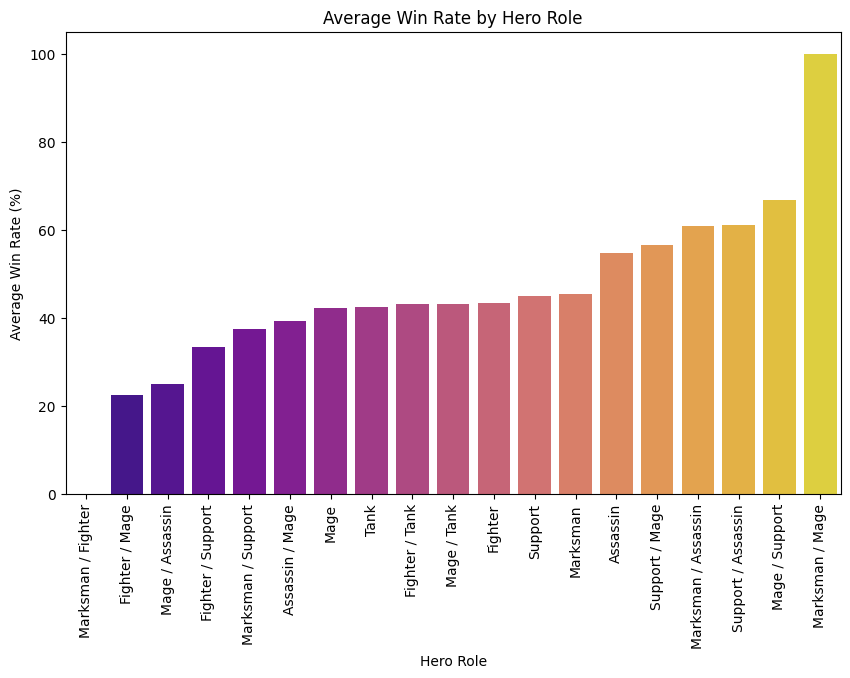

In [ ]:
# Menghitung rata-rata win rate berdasarkan role
avg_winrate_by_role = df.groupby('Roles')['T_WinRate'].mean().sort_values()

# Plot Average Win Rate by Hero Role
plt.figure(figsize=(10,6))
sns.barplot(x=avg_winrate_by_role.index, y=avg_winrate_by_role.values, palette='plasma')
plt.title('Average Win Rate by Hero Role')
plt.xlabel('Hero Role')
plt.ylabel('Average Win Rate (%)')
plt.xticks(rotation=90)
plt.show()


Correlation Between Hero Picks & Rates

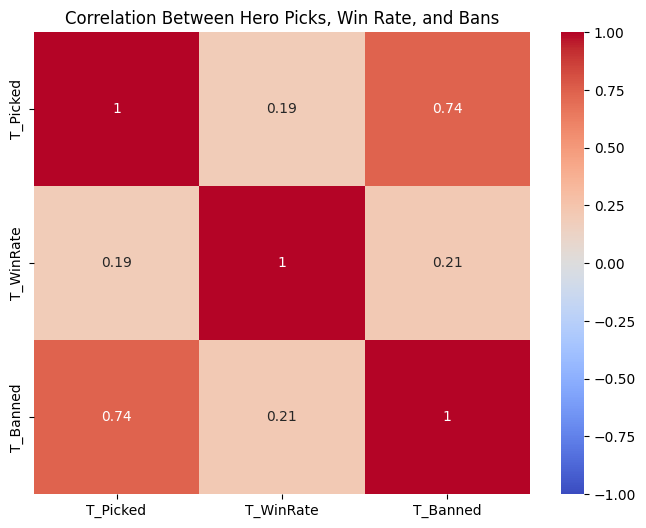

In [ ]:
# Menghitung korelasi
corr_matrix = df[['T_Picked', 'T_WinRate', 'T_Banned']].corr()

# Plot heatmap korelasi
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Between Hero Picks, Win Rate, and Bans')
plt.show()


Ban Percentage of Each Hero

In [ ]:
# DataSorting
hero_ban = df.sort_values(by='T_BansPercentage', ascending=False)

#Buat Bar
fig = px.bar(
    hero_ban,
    x='Hero',
    y='T_BansPercentage',
    color='T_BansPercentage',
    labels={'T_BansPercentage': 'Ban Percentage'},
    title='Ban Percetage each Hero',
)
fig.update_layout(
    yaxis=dict(title='Ban Percentage (in %)'),
    xaxis=dict(tickfont=dict(size=9)),
    xaxis_tickangle=-45,
    height=600,
    width=1800,
    bargap=0.4
)
fig.show()

High Pick and Ban Hero Percentages

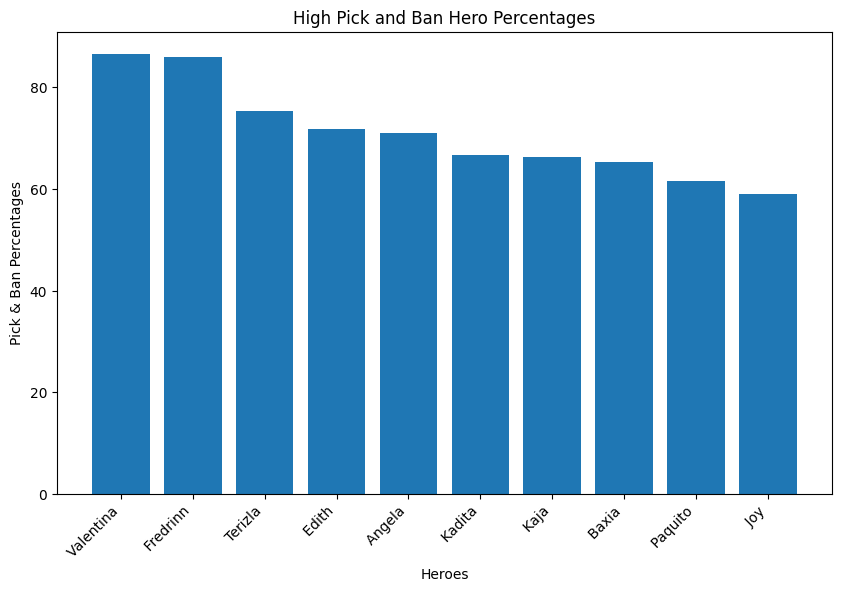

In [ ]:
#Sorting top 10
high_pickban = df.sort_values(by='T_PicksBansPercentage',
                              ascending=False).head(10)

#Buat Bar
plt.figure(figsize=(10, 6))
plt.bar(high_pickban['Hero'], high_pickban['T_PicksBansPercentage'])
plt.title('High Pick and Ban Hero Percentages')
plt.xlabel('Heroes')
plt.ylabel('Pick & Ban Percentages')
plt.xticks(rotation=45, ha='right')
plt.show()

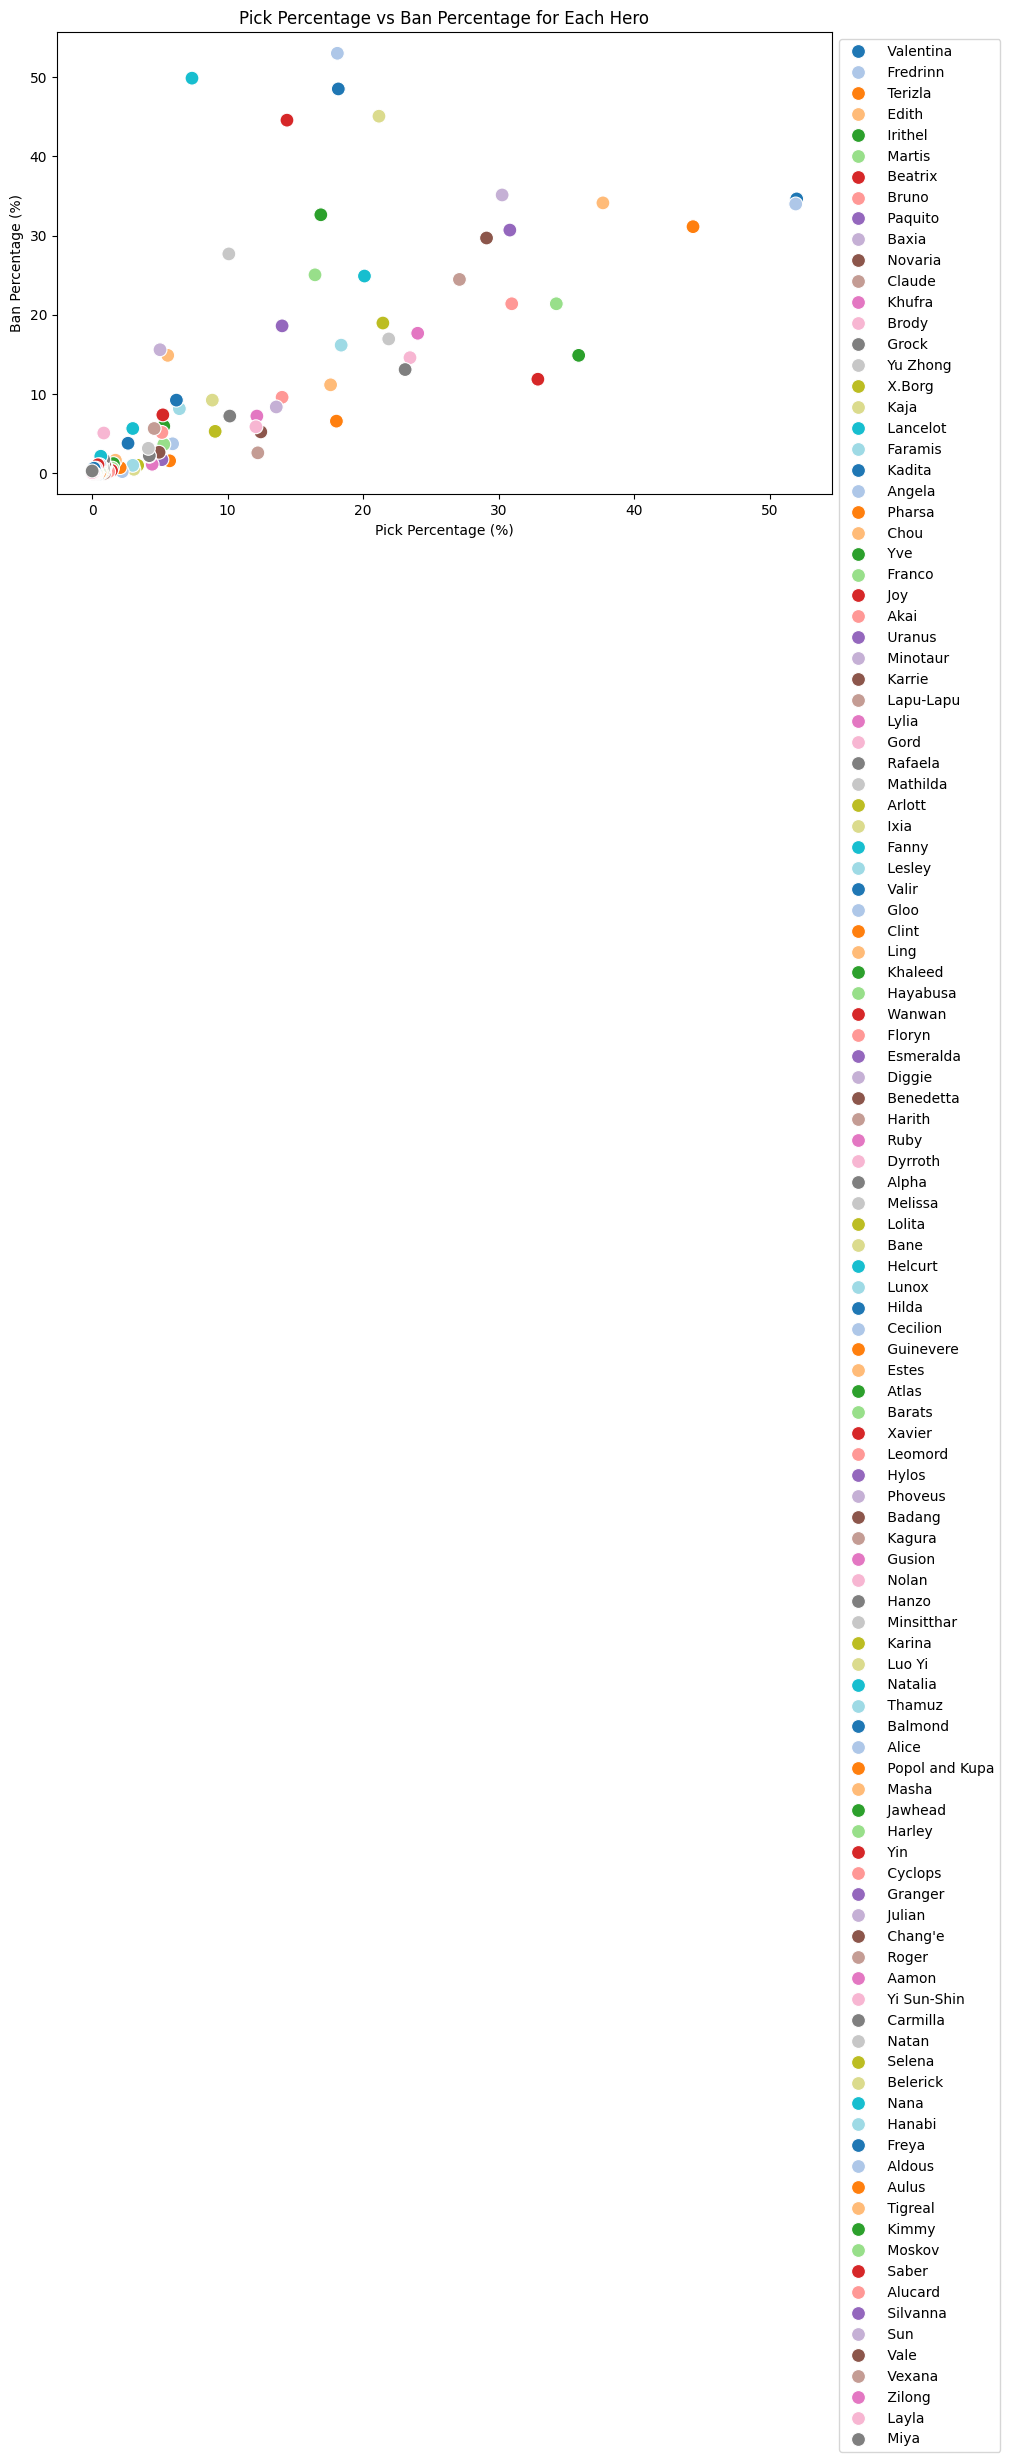

In [ ]:
# Plot pick percentage vs ban percentage each hero
plt.figure(figsize=(10,6))
sns.scatterplot(x='T_PickPercentage', y='T_BansPercentage', hue='Hero', data=df,
                palette='tab20', s=100)
plt.title('Pick Percentage vs Ban Percentage for Each Hero')
plt.xlabel('Pick Percentage (%)')
plt.ylabel('Ban Percentage (%)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


Relationship between Picks, Bans, and Wins

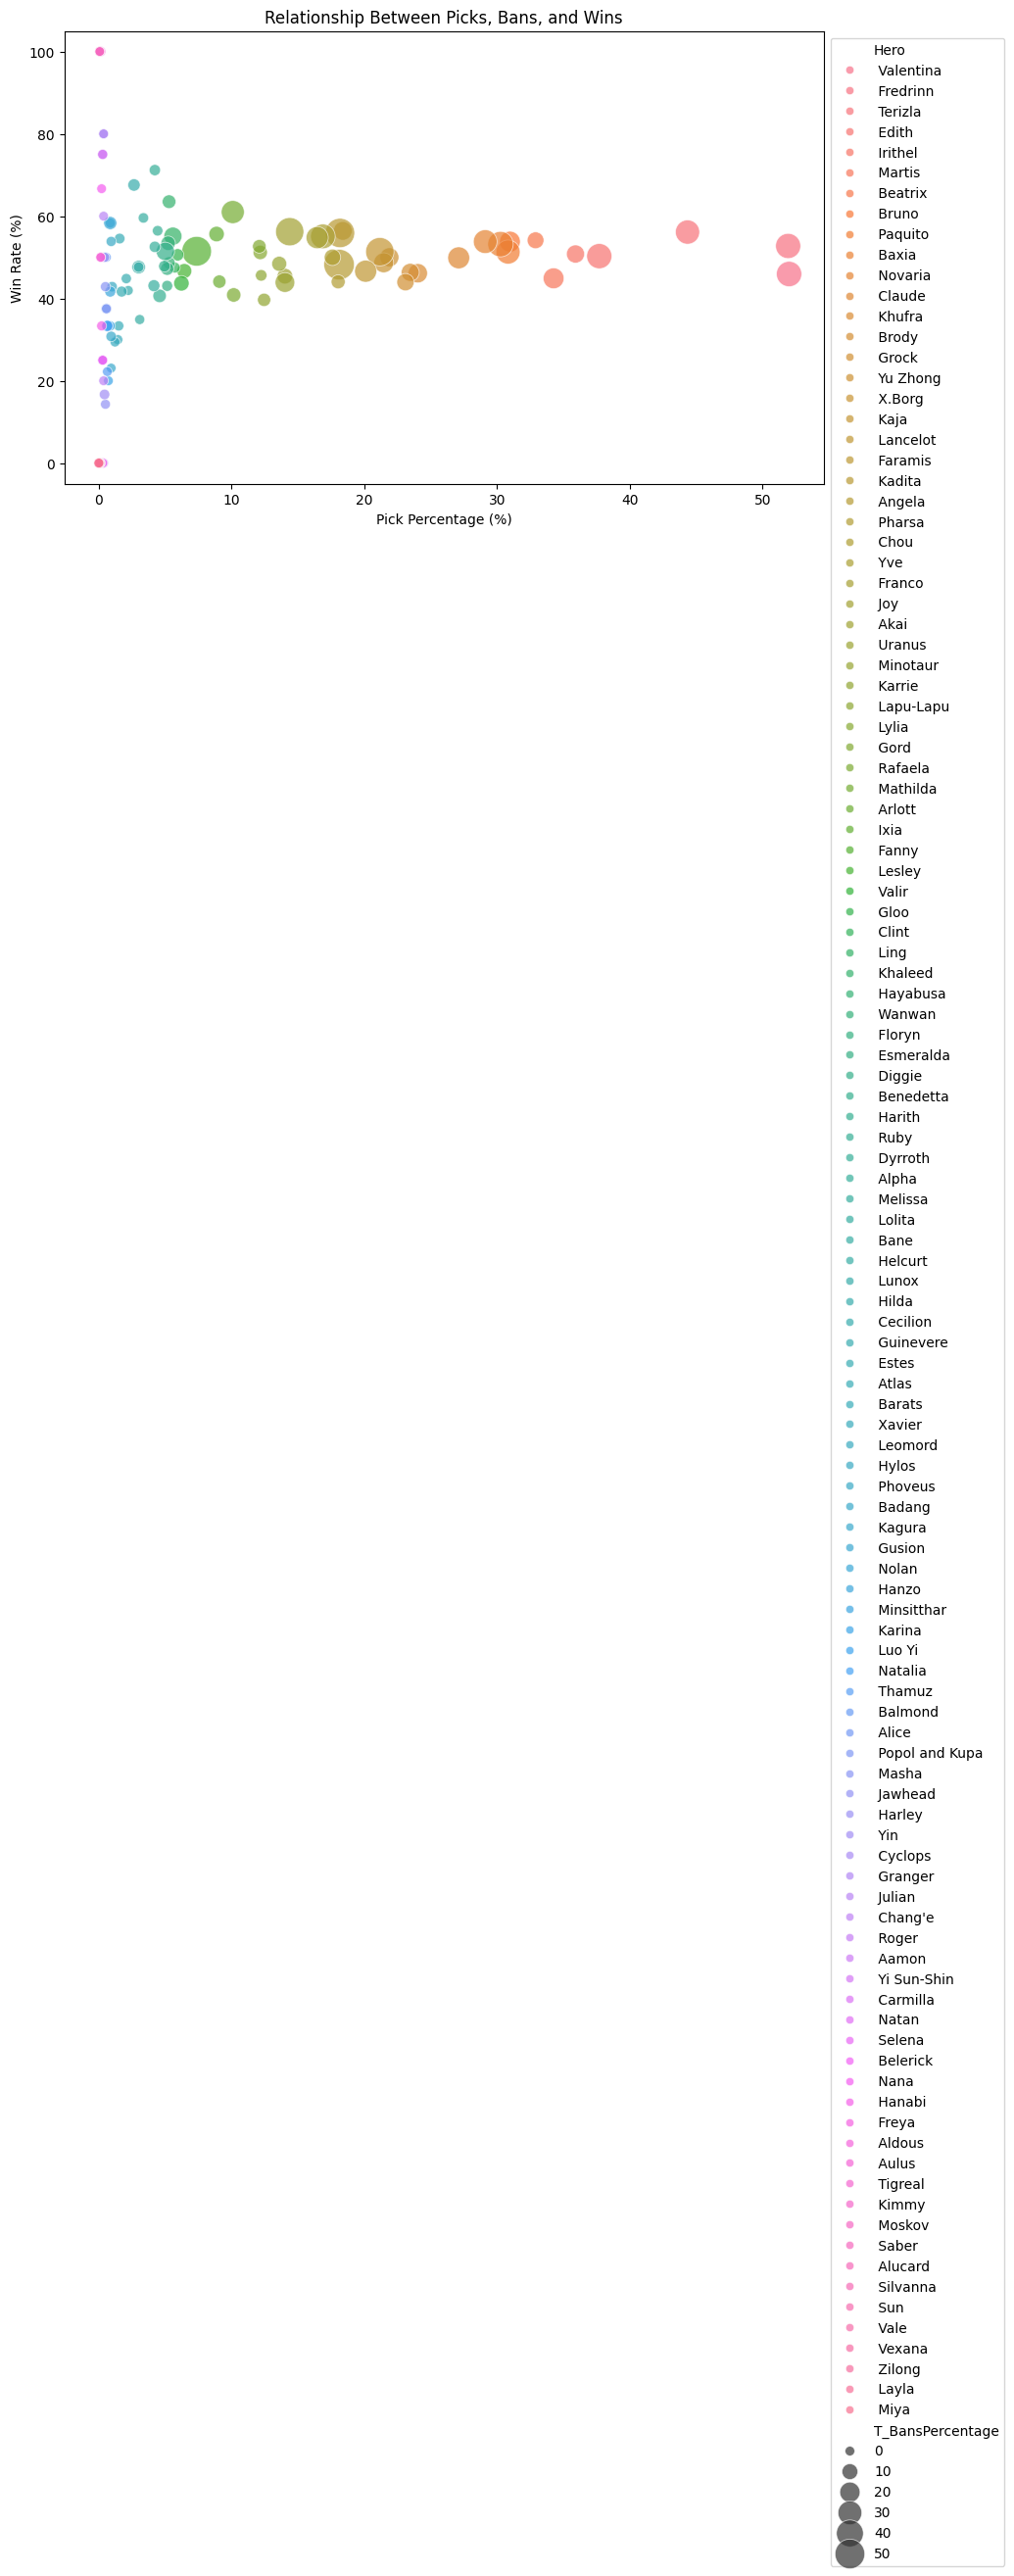

In [ ]:
# Plot relationship antara pick, ban, dan win rate
plt.figure(figsize=(10,6))
sns.scatterplot(x='T_PickPercentage', y='T_WinRate', size='T_BansPercentage',
                hue='Hero', data=df, sizes=(50, 500), alpha=0.7)
plt.title('Relationship Between Picks, Bans, and Wins')
plt.xlabel('Pick Percentage (%)')
plt.ylabel('Win Rate (%)')
plt.legend(bbox_to_anchor=(1, 1))
plt.show()


Top 10 Hero Pick

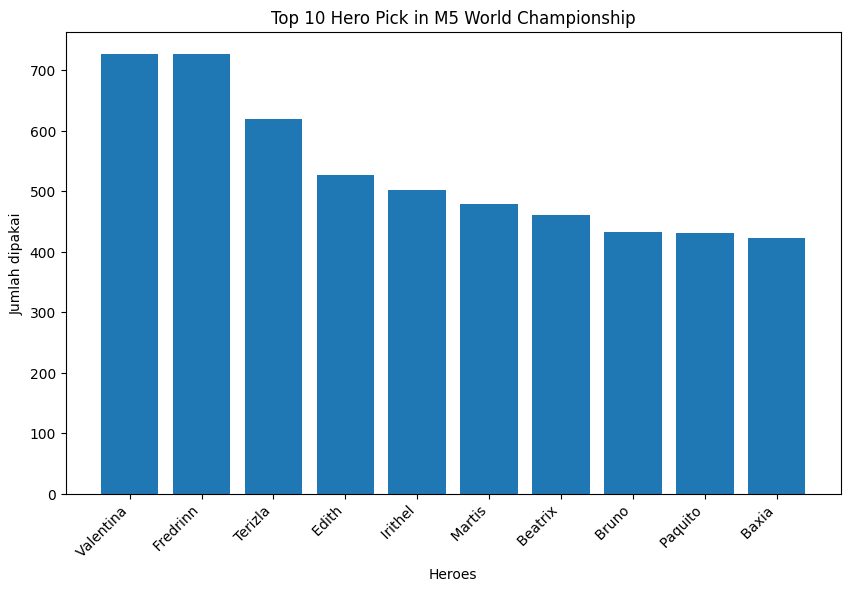

In [ ]:

#Sort
most_pick = df.sort_values(by='T_Picked', ascending=False).head(10)
most_pick

#Membuat Bar
plt.figure(figsize=(10, 6))
plt.bar(most_pick['Hero'], most_pick['T_Picked'])
plt.title('Top 10 Hero Pick in M5 World Championship')
plt.xlabel('Heroes')
plt.ylabel('Jumlah dipakai')
plt.xticks(rotation=45, ha='right')
plt.show()